The Eular Lagrangian equation

$\frac{d}{dt}\left(\frac{\partial L}{\partial\dot{x}}\right)-\frac{\partial L}{\partial x}=0$

For the spherical coodinate with $r=R$

$r=R\left(\sin\left(\theta\right)\cos\left(\phi\right),\sin\left(\theta\right)\sin\left(\phi\right),\cos\left(\theta\right)\right)$

$\dot{r}=R\left(\cos\left(\theta\right)\cos\left(\phi\right),\cos\left(\theta\right)\sin\left(\phi\right),-\sin\left(\theta\right)\right)\dot{\theta}+R\left(-\sin\left(\theta\right)\sin\left(\phi\right),\sin\left(\theta\right)\cos\left(\phi\right),0\right)\dot{\phi}$

$T=\frac{1}{2}m\dot{r}^{2}=\frac{1}{2}mR\left(\dot{\theta}^{2}+\sin^{2}\theta\dot{\phi}^{2}\right)$

$L\left(\dot{\theta},\theta,\phi,\dot{\phi}\right)=\frac{1}{2}mR\left(\dot{\theta}^{2}+\sin^{2}\theta\dot{\phi}^{2}\right)$

Put it into Lagrange equation and it becomes

$\frac{d}{dt}\left(mR^{2}\dot{\theta}\right)-mR^{2}\dot{\phi}^{2}\sin\theta\cos\theta	=0$

$\frac{d}{dt}\left(mR^{2}\dot{\phi}\sin^{2}\theta\right)-0	=0$

After we rearrange it, we can get

$\begin{cases}
\ddot{\theta}-\sin\theta\cos\theta\dot{\phi}^{2}=0\\
\dot{\phi}=\frac{\dot{\phi}_{0}\sin^{2}\theta_{0}}{\sin^{2}\theta}
\end{cases}$

By using $\dot{\phi}=\frac{\dot{\phi}_{0}\sin^{2}\theta_{0}}{\sin^{2}\theta}$, we can get

$\ddot{\theta}-\frac{\dot{\phi}_{0}^{2}\sin^{4}\theta_{0}\cos\theta}{\sin^{3}\theta}=0$

Let $\chi=\dot{\theta}$. I can get 

$\begin{cases}
\dot{\chi}=\frac{\dot{\phi}_{0}^{2}\sin^{4}\theta_{0}\cos\theta}{\sin^{3}\theta}\\
\dot{\theta}=\chi\\
\dot{\phi}=\frac{\dot{\phi}_{0}\sin^{2}\theta_{0}}{\sin^{2}\theta}
\end{cases}$


First case: initial condition is $\chi_{0}=\dot{\theta}_{0}=\frac{\pi}{10}$, $\theta_{0}=\frac{\pi}{18}$, $\dot{\phi}_{0}=\frac{\pi}{10}$ and $\phi_{0}=0$

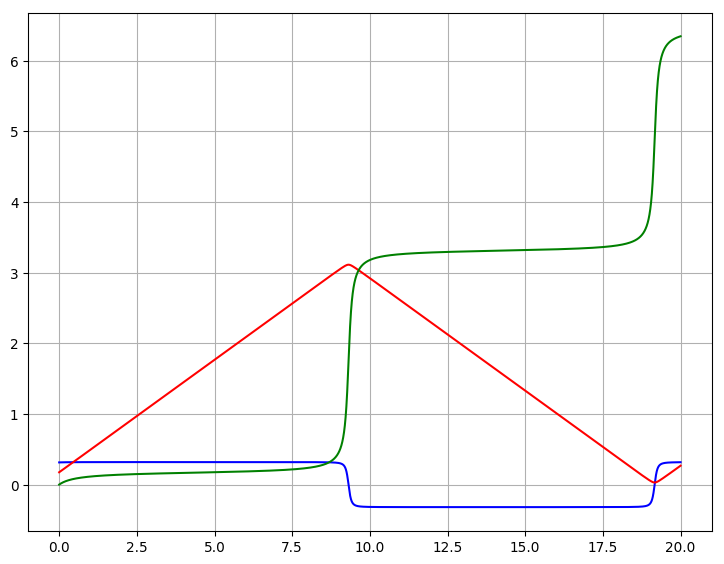

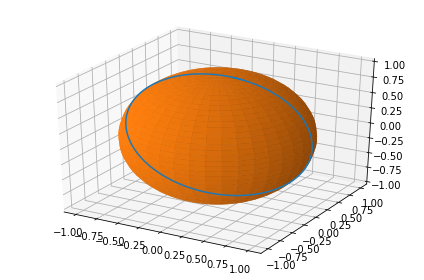

The period is 19.705119705119706


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook

def f_int(y, x, dphi0, thet0): 
    return [(dphi0**2)*(np.cos(y[1])*np.sin(thet0)**4)/(np.sin(y[1])**3),y[0],(dphi0*np.sin(thet0)**2)/(np.sin(y[1])**2)]

y_0 = np.array([np.pi/10, np.pi/18, 0.0]) #Initial condition: \chi \theta \phi

x = np.linspace(0.0, 20.0, 1000000) 

y_sol = odeint(f_int, y_0, x, args=(np.pi/10,np.pi/18))

plt.figure(figsize=(9,7),dpi=98)
plt.plot(x, y_sol[:,0],'b')
plt.plot(x, y_sol[:,1],'r')
plt.plot(x, y_sol[:,2],'g')
plt.grid(True)
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

x1 = np.sin(y_sol[:,1])*np.cos(y_sol[:,2])
y1 = np.sin(y_sol[:,1])*np.sin(y_sol[:,2])
z1 = np.cos(y_sol[:,1])
ax.plot(x1, y1, z1)

us = np.linspace(0, np.pi, 40)
vs = np.linspace(0, 2 * np.pi, 40)
xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)
ax.legend()
fig.tight_layout()
plt.show()

#Find out next next same point, and find out the corresponding time (period).
n=0
for i in range(900000):
    if np.abs(y_sol[i+100000,1]-y_sol[0,1])<1e-6 and n==0: #First one
        n=1
    if np.abs(y_sol[i+100000,1]-y_sol[0,1])<1e-6 and n==1: #Second one
        print('The period is',x[i+100000])
        break
        

Second case: initial condition is $\chi_{0}=\dot{\theta}_{0}=\frac{\pi}{10}$, $\theta_{0}=\frac{\pi}{3}$, $\dot{\phi}_{0}=\frac{\pi}{10}$ and $\phi_{0}=0$

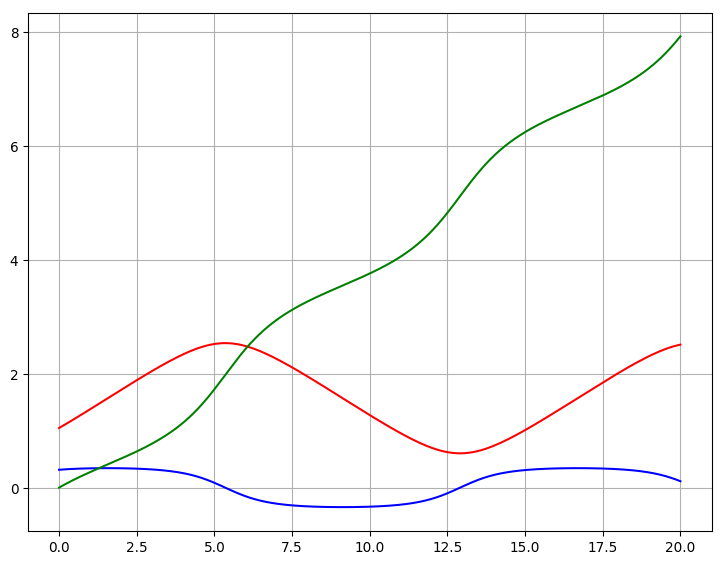

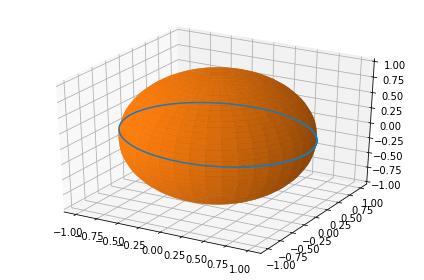

The period is 15.118575118575118


In [3]:
x = np.linspace(0.0, 20.0, 1000000)
y_0 = np.array([np.pi/10, np.pi/3, 0.0]) #Initial condition: \chi \theta \phi
y_sol = odeint(f_int, y_0, x, args=(np.pi/10,np.pi/3))
plt.figure(figsize=(9,7),dpi=98)
plt.plot(x, y_sol[:,0],'b')
plt.plot(x, y_sol[:,1],'r')
plt.plot(x, y_sol[:,2],'g')
plt.grid(True)
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

x1 = np.sin(y_sol[:,1])*np.cos(y_sol[:,2])
y1 = np.sin(y_sol[:,1])*np.sin(y_sol[:,2])
z1 = np.cos(y_sol[:,1])
ax.plot(x1, y1, z1)

us = np.linspace(0, np.pi, 40)
vs = np.linspace(0, 2 * np.pi, 40)
xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)
ax.legend()
fig.tight_layout()
plt.show()

n=0
for i in range(900000):
    if np.abs(y_sol[i+100000,1]-y_sol[0,1])<1e-6 and n==0:
        n=1
    if np.abs(y_sol[i+100000,1]-y_sol[0,1])<1e-6 and n==1:
        print('The period is',x[i+100000])
        break

Third case: initial condition is $\chi_{0}=\dot{\theta}_{0}=\frac{\pi}{5}$, $\theta_{0}=\frac{\pi}{3}$, $\dot{\phi}_{0}=\frac{\pi}{5}$ and $\phi_{0}=0$

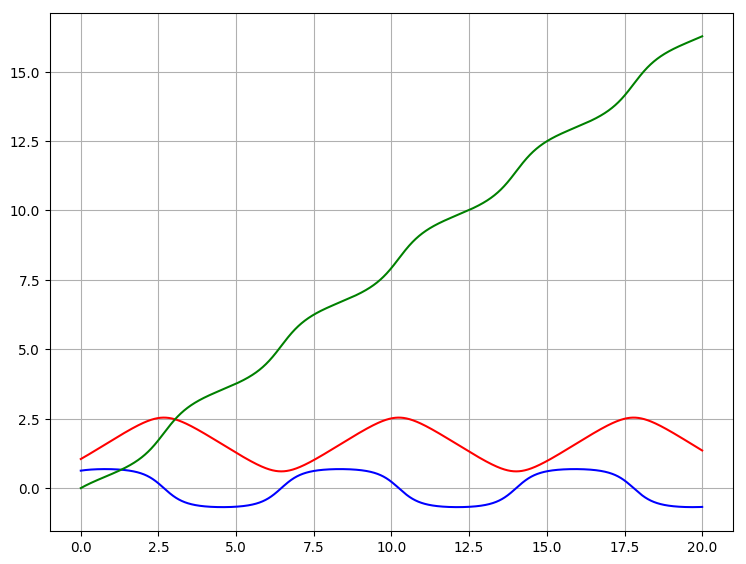

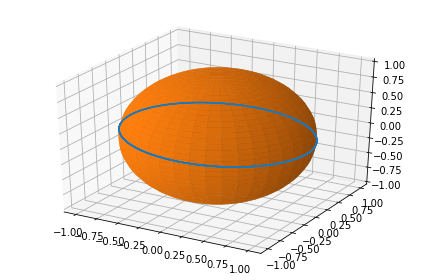

The period is 7.559287559287559


In [4]:
x = np.linspace(0.0, 20.0, 1000000)
y_0 = np.array([np.pi/5, np.pi/3, 0.0]) #Initial condition: \chi \theta \phi
y_sol = odeint(f_int, y_0, x, args=(np.pi/5,np.pi/3))
plt.figure(figsize=(9,7),dpi=98)
plt.plot(x, y_sol[:,0],'b')
plt.plot(x, y_sol[:,1],'r')
plt.plot(x, y_sol[:,2],'g')
plt.grid(True)
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

x1 = np.sin(y_sol[:,1])*np.cos(y_sol[:,2])
y1 = np.sin(y_sol[:,1])*np.sin(y_sol[:,2])
z1 = np.cos(y_sol[:,1])
ax.plot(x1, y1, z1)

us = np.linspace(0, np.pi, 40)
vs = np.linspace(0, 2 * np.pi, 40)
xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)
ax.legend()
fig.tight_layout()
plt.show()

n=0
for i in range(900000):
    if np.abs(y_sol[i+100000,1]-y_sol[0,1])<2e-6 and n==0:
        n=1
    if np.abs(y_sol[i+100000,1]-y_sol[0,1])<2e-6 and n==1:
        print('The period is',x[i+100000])
        break

Fourth case: initial condition is $\chi_{0}=\dot{\theta}_{0}=\frac{\pi}{5}$, $\theta_{0}=\frac{\pi}{3}$, $\dot{\phi}_{0}=\frac{\pi}{10}$ and $\phi_{0}=0$

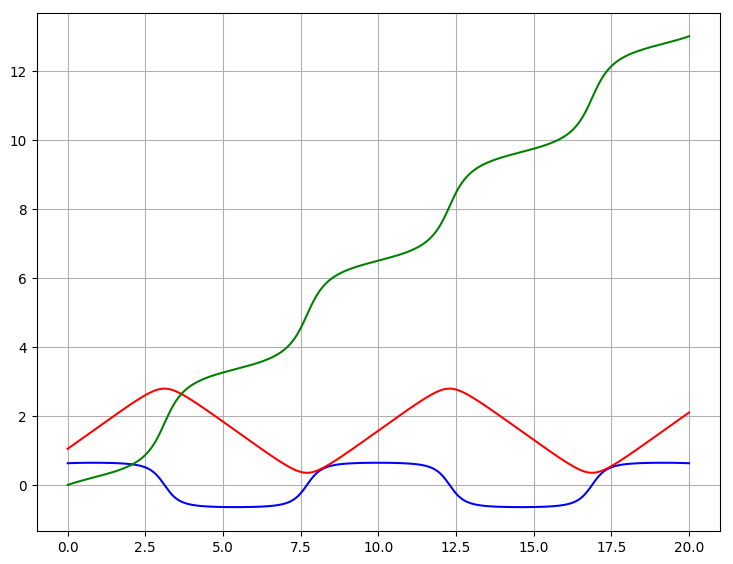

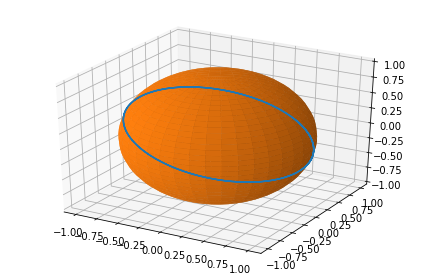

The period is 9.176629176629177


In [5]:
x = np.linspace(0.0, 20.0, 1000000)
y_0 = np.array([np.pi/5, np.pi/3, 0.0]) #Initial condition: \chi \theta \phi
y_sol = odeint(f_int, y_0, x, args=(np.pi/10,np.pi/3))
plt.figure(figsize=(9,7),dpi=98)
plt.plot(x, y_sol[:,0],'b')
plt.plot(x, y_sol[:,1],'r')
plt.plot(x, y_sol[:,2],'g')
plt.grid(True)
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

x1 = np.sin(y_sol[:,1])*np.cos(y_sol[:,2])
y1 = np.sin(y_sol[:,1])*np.sin(y_sol[:,2])
z1 = np.cos(y_sol[:,1])
ax.plot(x1, y1, z1)

us = np.linspace(0, np.pi, 40)
vs = np.linspace(0, 2 * np.pi, 40)
xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)
ax.legend()
fig.tight_layout()
plt.show()

n=0
for i in range(900000):
    if np.abs(y_sol[i+100000,1]-y_sol[0,1])<2e-6 and n==0:
        n=1
    if np.abs(y_sol[i+100000,1]-y_sol[0,1])<2e-6 and n==1:
        print('The period is',x[i+100000])
        break